# <font color='blue'> BY: Mohamed Ashraf Gaber </font>

## This is a Simple Recommendation System.
## It suggests items that are most similar to a particular item, in this case, movies.
## <font color='red'>NOTE: The data is small so the result mightn't be accurate.</font>

## Importing libraries we will need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Importing the data.

In [2]:
movies_data = pd.read_csv('movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
ratings_data = pd.read_csv('ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Merging the two data sets above into one data to get access to [userid, movieid, rating and title].

In [6]:
df = pd.merge(ratings_data, movies_data, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Dropping columns we willn't use.
### We willn't use the timestamp and genres columns.

In [7]:
df.drop(['timestamp', 'genres'], axis=1, inplace=True)
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


### Creating a new DataFrame that contains the rating and the number of ratings for each movie.

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [9]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


## Data Visualization.

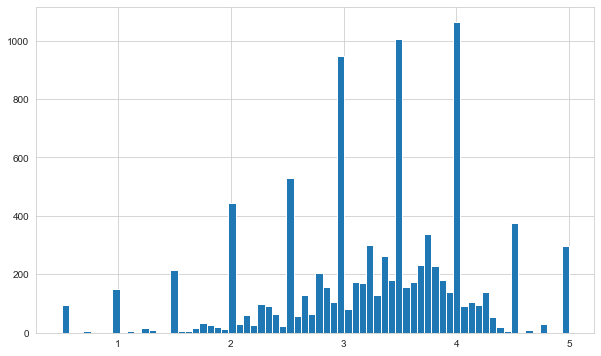

In [10]:
plt.figure(figsize=(10, 6))
ratings['rating'].hist(bins=70)

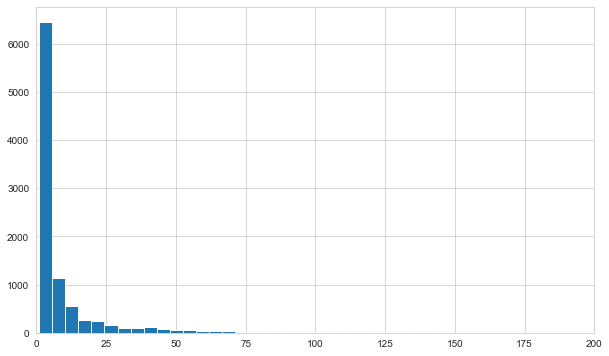

In [11]:
plt.figure(figsize=(10, 6))
plt.xlim([0, 200])
ratings['number of ratings'].hist(bins=70)

<Figure size 720x432 with 0 Axes>

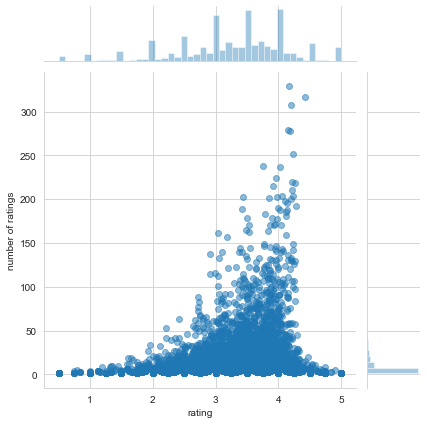

In [12]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='rating', y='number of ratings', data=ratings, alpha=0.5)

## Start creating the recommender system.

In [13]:
moviemat = df.pivot_table(index='userId', columns='title', values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings['number of ratings'].sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: number of ratings, dtype: int64

### I will take "The Matrix (1999)" movie for an example.

In [15]:
ratings[ratings.index == 'Matrix, The (1999)']

,rating,number of ratings
title,,
"Matrix, The (1999)",4.192446,278


In [16]:
thematrix_ratings = moviemat['Matrix, The (1999)']
thematrix_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

### Getting the correlation between all movies and "The matrix" movie.

In [17]:
similar_to_thematrix = moviemat.corrwith(thematrix_ratings)
similar_to_thematrix.head(10)

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                        -0.160843
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.302316
*batteries not included (1987)             0.392232
dtype: float64

### Puting the result in a DataFrame to seem good.
### Droping all "NaN" values from the DataFrame.

In [18]:
corr_thematrix = pd.DataFrame(similar_to_thematrix, columns=['Correlation'])
corr_thematrix.dropna(inplace=True)

corr_thematrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


### Joining the "number of ratings" to this DataFrame to know how many people rated the two movies and get more accurate values.

In [19]:
corr_thematrix = corr_thematrix.join(ratings['number of ratings'])
corr_thematrix.head(10)

,Correlation,number of ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.637813,14
10 Items or Less (2006),1.000000,3
10 Things I Hate About You (1999),0.166496,54
"10,000 BC (2008)",0.205960,17


### These are the recommendation movies.
### Here I put a minimum number for "number of ratings".

In [20]:
corr_thematrix[corr_thematrix['number of ratings'] >= 70].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Interstellar (2014),0.599040,73
"Dark Knight Rises, The (2012)",0.557125,76
Die Hard (1988),0.544466,145


### This function will do all things we did above.
### You can just call it and pass the name of movie you want and the it will return the recommendation movies.
### <font color='red'>NOTE: You should write the movie title with its year like in the data.</font>

In [21]:
def get_recommendation(movie, number=10):
    # Making a DataFrame with the correlation between all movies and this movie
    corr_movie = pd.DataFrame(moviemat.corrwith(moviemat[movie]), columns=['Correlation'])
    corr_movie.dropna(inplace=True)  # Droping all "NaN" values
    
    # Joining the "number of ratings" to this DataFrame to know how many people rated the two movies and get more accurate values
    corr_movie = corr_movie.join(ratings['number of ratings'])
    
    # Getting the recomendation
    recommendation = corr_movie[corr_movie['number of ratings'] >= 70].sort_values('Correlation', ascending=False)
    
    return recommendation.head(number)  # Returning the first 10 movies

## Here is some Recommendation.

In [22]:
get_recommendation('Iron Man (2008)')

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number of ratings
title,,
Iron Man (2008),1.000000,94
Ratatouille (2007),0.657183,72
Slumdog Millionaire (2008),0.637293,71
X2: X-Men United (2003),0.609979,76
Dave (1993),0.590791,76
X-Men (2000),0.583925,133
"Bourne Ultimatum, The (2007)",0.560186,81
"Hangover, The (2009)",0.548088,76
Meet the Parents (2000),0.543408,91


In [23]:
get_recommendation('Captain America: The First Avenger (2011)')

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number of ratings
title,,
Stargate (1994),0.849455,140
While You Were Sleeping (1995),0.842665,98
Pretty Woman (1990),0.784226,135
Quiz Show (1994),0.763763,81
Demolition Man (1993),0.754679,81
Seven (a.k.a. Se7en) (1995),0.741646,203
Face/Off (1997),0.738827,77
X2: X-Men United (2003),0.737430,76
X-Men (2000),0.736368,133


In [24]:
get_recommendation('Iron Man 2 (2010)')

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number of ratings
title,,
Dave (1993),0.857750,76
Iron Man (2008),0.758589,94
"Bourne Supremacy, The (2004)",0.749325,75
"Pan's Labyrinth (Laberinto del fauno, El) (2006)",0.746149,81
Mission: Impossible II (2000),0.705645,77
Star Wars: Episode III - Revenge of the Sith (2005),0.699026,78
"Rock, The (1996)",0.690388,121
X2: X-Men United (2003),0.687685,76
Shaun of the Dead (2004),0.667633,77
